# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 6


### Zadanie 1

Zaimplementuj symulację paradoksu Monty'ego Halla. Np. po 10 000 rozgrywek dla obu przypadków (kiedy gracz zostaje przy wybranej bramke oraz kiedy gracz zmienia wybór).
Czy wnik symulacji jest zgodny z teorią? 

Z [Wikipedii](https://pl.wikipedia.org/wiki/Paradoks_Monty%E2%80%99ego_Halla):

> Zawodnik stoi przed trzema zasłoniętymi bramkami. Za jedną z nich (za którą – wie to tylko prowadzący program) jest nagroda (umieszczana całkowicie losowo). Gracz wybiera jedną z bramek. Prowadzący program odsłania inną bramkę (co istotne – anonsując, że jest to bramka pusta), po czym proponuje graczowi zmianę wyboru. <br /><br />
Intuicyjnie nie ma znaczenia, czy zawodnik pozostanie przy swoim wyborze, czy nie. Okazuje się jednak, że jest inaczej. Przy wyborze strategii pozostawania przy swoim pierwszym wyborze prawdopodobieństwo wygranej wynosi 1/3. Natomiast przy wyborze „strategii zmiany” wynosi 2/3. <br /><br />
Oznacza to, że zawodnikowi opłaci się zmienić bramkę, ponieważ ma wtedy dwa razy większe szanse na wygraną. Paradoks wynika z niedocenienia informacji, jaką „między wierszami” przekazuje prowadzący. Informacją tą jest wskazanie pustej bramki. <br /><br />
Innymi słowy poprzez otwarcie jednej z pustych bramek prowadzący zmniejsza liczność zbioru „pustych bramek”, a w rezultacie prawdopodobieństwo przegranej z 2/3 do 1/3. „Pozostałe” prawdopodobieństwo wygranej musi wynosić więc obecnie 2/3.
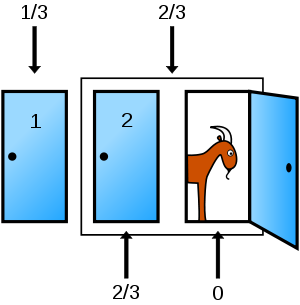




In [1]:
import numpy as np

In [2]:
import random

# returns True in case of win, False otherwize
def monty_hall_simulation(change):
    doors = {0, 1, 2}
    car_pos = random.choice(list(doors))
    guess_pos = random.choice(list(doors))
    reveal_pos = random.choice(list(doors - {guess_pos, car_pos}))
    if change:
        guess_pos = list(doors - {guess_pos, reveal_pos})[0]
    return guess_pos == car_pos
    

In [3]:
def calc_monty_hall_probability(change, iters):
    results = np.array([monty_hall_simulation(change) for i in range(iters)])
    return np.sum(results) / results.size

In [4]:
no_change_prob = calc_monty_hall_probability(change=False, iters=1_000_000)
print(f'Probability of win without changing decision: {no_change_prob}')

Probability of win without changing decision: 0.334064


In [5]:
change_prob = calc_monty_hall_probability(change=True, iters=1_000_000)
print(f'Probability of win with changing decision: {change_prob}')

Probability of win with changing decision: 0.667174


### Zadanie 2

#### A)
Wczytaj z klawiatury $m$ liter (mogą się powtarzać), a następnie wypisz wszystkie permutacje tych $m$ liter, podkreślając te, które tworzą poprawne polskie słowa (na podstawie słownika ściągniętego i wypakowanego z https://sjp.pl/sl/growy/).

Warunki:
- W jednej linii należy wypisać 5 permutacji, po czym przejść do nowego wiersza.
- Jeśli wprowadzony napis zawiera znaki spoza `[a-z]` (tylko litery łacińskie), to należy wypisać stosowny komunikat.
- Wprowadzone litery mogą się powtarzać, ale permutacji wtedy nie powtarzamy. 
Przykładowo, dla wprowadzonego ciągu `aaab` program ma wypisać tylko 4 permutacje (w dowolnej kolejności): `aaab`, `aaba`, `abaa`, `baaa`.

Przykład:

```
Podaj 4 litery z [a-z]: aatm
aatm    aamt    atam    atma    amat

amta    taam    tama    tmaa    maat
                ----
mata    mtaa
----
```

#### B)
Napisz wzór, który umożliwi wyświetlenie liczby tak opisanych permutacji bez konieczności ich generowania.



In [6]:
def read_words():
    with open('slowa.txt', encoding='UTF-8') as f:
        lines = f.readlines()
        words = [line.strip() for line in lines]
        return set(words)
    
correct_words = read_words()

In [7]:
import re
import itertools

def get_possible_words(letters):
    permutations = list(set(itertools.permutations(letters)))
    words = [''.join(permutation) for permutation in permutations]
    return words

m = 4

while True:
    text = input(f'Podaj {m} litery [a-z]:')
    text = text.lower()
    
    if len(text) == 0:
        break

    if re.fullmatch(r'[a-z]{' + str(m) + '}', text) is None:
        print('Podane nieprawidłowe dane')
        continue
        
    words = get_possible_words(text)
    
    while words:
        row_words = words[:5]
        words = words[5:]
        for word in row_words:
            print(f'{word}', end='  ')
            
        print()
        
        for word in row_words:
            if word in correct_words:
                print('-'*m, end='  ')
            else:
                print(' '*m, end='  ')
        print()
        
print('Zakończono')

Podaj 4 litery [a-z]: adcb


cabd  dbca  adcb  bdac  dabc  
                              
cbad  cdab  acbd  bdca  bacd  
                              
adbc  badc  bcad  cadb  cbda  
                              
dacb  dbac  dcba  dcab  acdb  
                              
cdba  abcd  bcda  abdc  
                        


Podaj 4 litery [a-z]: abce


bace  ebca  ceba  caeb  cbea  
----                          
eabc  beac  bcae  ceab  aceb  
                              
abec  beca  bcea  aecb  abce  
                              
ebac  eacb  ecba  cabe  ecab  
                              
cbae  aebc  acbe  baec  
                        


Podaj 4 litery [a-z]: 


Zakończono


In [8]:
# Obliczanie liczby permutacji
import math
from collections import Counter

def permutations_count(word):
    counter = Counter(word)
    counts = [mc[1] for mc in counter.most_common()]
    result = math.factorial(len(word))
    for count in counts:
        result /= math.factorial(count)
    return int(result)

In [10]:
# Testowanie wzoru
test_words = ['abcd', 'aaab', 'aabb', 'aaaa', 'aabcb']
for test_word in test_words:
    correct_count = len(get_possible_words(test_word))
    calculated_count = permutations_count(test_word)
    print(f'{test_word} - calculated: {calculated_count:<5} correct: {correct_count:<5}')

abcd - calculated: 24    correct: 24   
aaab - calculated: 4     correct: 4    
aabb - calculated: 6     correct: 6    
aaaa - calculated: 1     correct: 1    
aabcb - calculated: 30    correct: 30   
